In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
import matplotlib.ticker as mtick
plt.style.use('ggplot')


In [2]:
data_folder = 'E:\\Python\\algorithmic_trading_report'

sentiment_df = pd.read_csv(os.path.join(data_folder, 'sentiment_data.csv'))

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

sentiment_df = sentiment_df.set_index(['date', 'symbol'])

sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']>10)]

sentiment_df



C:\Users\ASUS\AppData\Local\Temp\ipykernel_9724\1560484532.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL             811             2592         21674   
           AMD              150              675          2949   
           AMZN             557             1315         12969   
           ATVI              82               36           131   
           BA                61               55           342   
...                         ...              ...           ...   
2023-01-04 T                184             3409         14271   
           TSLA            6767           540711       3810688   
           TSN               35              168           460   
           V                132             1008          5943   
           XOM              212              374          2071   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL               7981808               NaN          0.119590  
           AMD                1645270               NaN          0.228891  
           AMZN               5590695               NaN          0.101396  
           ATVI               1310715               NaN          0.274809  
           BA                  425847               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                   884935          0.590457          0.238876  
           TSLA              55464921          0.543057          0.141893  
           TSN                  57207          0.561900          0.365217  
           V                   139835          0.567286          0.169611  
           XOM                 483389          0.588914          0.180589  

[25375 rows x 6 columns]

In [3]:
aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])
                    [['engagement_ratio']].mean())

aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))

aggragated_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9724\1357384149.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])


engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

In [4]:
filtered_df = aggragated_df[aggragated_df['rank']<6].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           FCX             0.626323   5.0
           MNST            0.699721   3.0
           OXY             2.147741   1.0
           SLB             0.647374   4.0
2022-01-01 D               0.801994   5.0
           FCX             0.841220   4.0
           L               6.507246   1.0
           LUV             1.303215   2.0
           MA              0.883401   3.0
2022-02-01 AMD             0.715556   4.0
           D               1.136678   1.0
           FCX             0.655237   5.0
           LUV             1.035258   2.0
           MA              0.729063   3.0
2022-03-01 FCX             1.138332   2.0
           GILD            0.530886   5.0
           LUV             1.574377   1.0
           MRO             0.581748   4.0
           OXY             1.025579   3.0

In [5]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2021-12-01': ['AES', 'FCX', 'MNST', 'OXY', 'SLB'],
 '2022-01-01': ['D', 'FCX', 'L', 'LUV', 'MA'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MA'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'MRO', 'OXY'],
 '2022-04-01': ['A', 'CRM', 'PFE', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'J', 'KEY'],
 '2022-06-01': ['AMD', 'DD', 'FCX', 'KEY', 'LMT'],
 '2022-07-01': ['CB', 'CRM', 'DD', 'FCX', 'STZ'],
 '2022-08-01': ['A', 'DD', 'JPM', 'REGN', 'STZ'],
 '2022-09-01': ['ABT', 'DIS', 'L', 'META', 'MRNA'],
 '2022-10-01': ['J', 'KEY', 'L', 'META', 'MU'],
 '2022-11-01': ['A', 'DD', 'FCX', 'J', 'META'],
 '2022-12-01': ['AEP', 'AES', 'DD', 'J', 'STZ'],
 '2023-01-01': ['A', 'AES', 'DAL', 'J', 'KEY'],
 '2023-02-01': ['A', 'AES', 'BIIB', 'FCX', 'MDT']}

In [6]:
import pytz
from datetime import datetime as dt
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()
# stocks_list
tz = pytz.timezone("America/New_York")
start = tz.localize(dt(2021,1,1))
end = tz.localize(dt(2023,3,1))


prices_df = yf.download(tickers=stocks_list,
                        start=start,
                        end=end)
prices_df

[*********************100%%**********************]  85 of 85 completed

1 Failed download:
['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Price        Adj Close                                                         \
Ticker               A    AAL         AAP        AAPL        ABBV         ABT   
Date                                                                            
2021-01-04  115.980743  15.13  144.788589  126.830078   90.489510  102.054962   
2021-01-05  116.928986  15.43  144.632126  128.398178   91.425232  103.317635   
2021-01-06  120.135460  15.52  152.987808  124.076088   90.635445  103.102524   
2021-01-07  123.332191  15.38  154.294525  128.309982   91.605499  104.103333   
2021-01-08  124.211998  15.13  156.493896  129.417465   92.086227  104.393288   
...                ...    ...         ...         ...         ...         ...   
2023-02-22  140.565460  15.56  139.062622  147.918747  142.166763   99.620415   
2023-02-23  141.673523  15.87  137.503738  148.405487  143.487793   99.484589   
2023-02-24  139.694824  15.56  134.444016  145.733398  144.091660   97.457062   
2023-02-27  140.664383  15.63  136.167526  146.935364  145.573059   96.787682   
2023-02-28  140.456650  15.98  140.360138  146.428741  145.214478   98.679398   

Price                                                    ...   Volume  \
Ticker            AEP        AES         ALB        AMD  ...      RCL   
Date                                                     ...            
2021-01-04  71.591949  20.735624  148.095825  92.300003  ...  5732800   
2021-01-05  71.495377  21.431572  158.089859  92.769997  ...  4029500   
2021-01-06  72.066055  22.288118  169.898315  90.330002  ...  3612500   
2021-01-07  70.143234  22.065058  178.533920  95.160004  ...  3993700   
2021-01-08  69.519867  22.680702  178.630936  94.580002  ...  3104200   
...               ...        ...         ...        ...  ...      ...   
2023-02-22  86.226357  24.015272  242.647400  76.610001  ...  2044600   
2023-02-23  86.121910  24.015272  249.933228  79.750000  ...  2066600   
2023-02-24  85.856079  23.949064  245.670074  78.089996  ...  2875100   
2023-02-27  85.514290  23.532885  253.054306  78.769997  ...  2459700   
2023-02-28  83.520508  23.343718  250.386124  78.580002  ...  3662300   

Price                                                                          \
Ticker         REGN       SLB      STZ         T      TMO       TSLA      TSN   
Date                                                                            
2021-01-04   911100   8743400  1202600  86700816  2220400  145914600  2177400   
2021-01-05   797700  16256600  1530200  83054520  2046700   96735600  2297100   
2021-01-06  1434700  19456300  1861700  73455520  2112300  134100000  1942200   
2021-01-07  1126600  14502400  2537100  71265359  2144400  154496700  2969400   
2021-01-08  1018800  11951900  1595400  72471656  2221700  225166500  2672400   
...             ...       ...      ...       ...      ...        ...      ...   
2023-02-22   415500   9181100  1092200  25308800  1705300  191828500  4217700   
2023-02-23   553300   6324500   979700  24845800  1160200  146360000  3403500   
2023-02-24   525900   8458700   702900  29138100   852600  142228100  2439300   
2023-02-27   557100   6287000   608200  22981100  1110600  161028300  3922200   
2023-02-28   622700  10634200  1136900  34154800  1188800  153144900  3556300   

Price                           
Ticker             V       XOM  
Date                            
2021-01-04  10318300  27764700  
2021-01-05   6869700  44035100  
2021-01-06   7206200  36484800  
2021-01-07  10967900  29528100  
2021-01-08   6513000  28628200  
...              ...       ...  
2023-02-22   4621800  13973800  
2023-02-23   5533800  11289400  
2023-02-24   4414400  14351000  
2023-02-27   4255300  11710500  
2023-02-28   5385400  18107000  

[542 rows x 510 columns]

In [14]:
portfolio_data = []

for start_date in fixed_dates.keys():
    
    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date]
    
    returns_df = np.log(prices_df['Adj Close']).diff()
    returns_df = returns_df.dropna(how='all') 
    
    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return') # Calculate returns
    
    portfolio_data.append(temp_df) # Append the calculated returns DataFrame to the list

portfolio_df = pd.concat(portfolio_data, axis=0) # Now you have data to concatenate

display(portfolio_df)

,portfolio_return
Date,
2021-12-01,-0.016417
2021-12-02,0.024872
2021-12-03,-0.007711
2021-12-06,0.023926
2021-12-07,0.030547
...,...
2023-02-22,-0.007870
2023-02-23,-0.007323
2023-02-24,-0.009463


In [15]:
qqq_df = yf.download(tickers='QQQ',
                     start='2021-01-01',
                     end='2023-03-01')

qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

portfolio_df = portfolio_df.merge(qqq_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.016417,-0.017159
2021-12-02,0.024872,0.007181
2021-12-03,-0.007711,-0.017542
2021-12-06,0.023926,0.007981
2021-12-07,0.030547,0.029669
...,...,...
2023-02-22,-0.007870,0.000748
2023-02-23,-0.007323,0.008696
2023-02-24,-0.009463,-0.016886


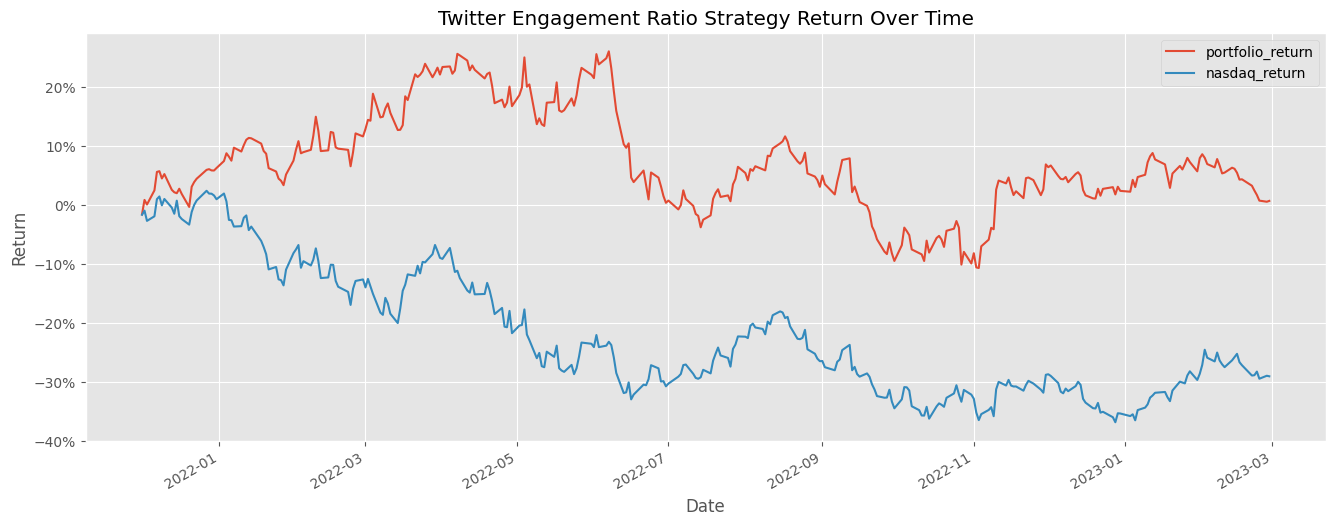

In [19]:
portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize=(16,6))

plt.title('Twitter Engagement Ratio Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()